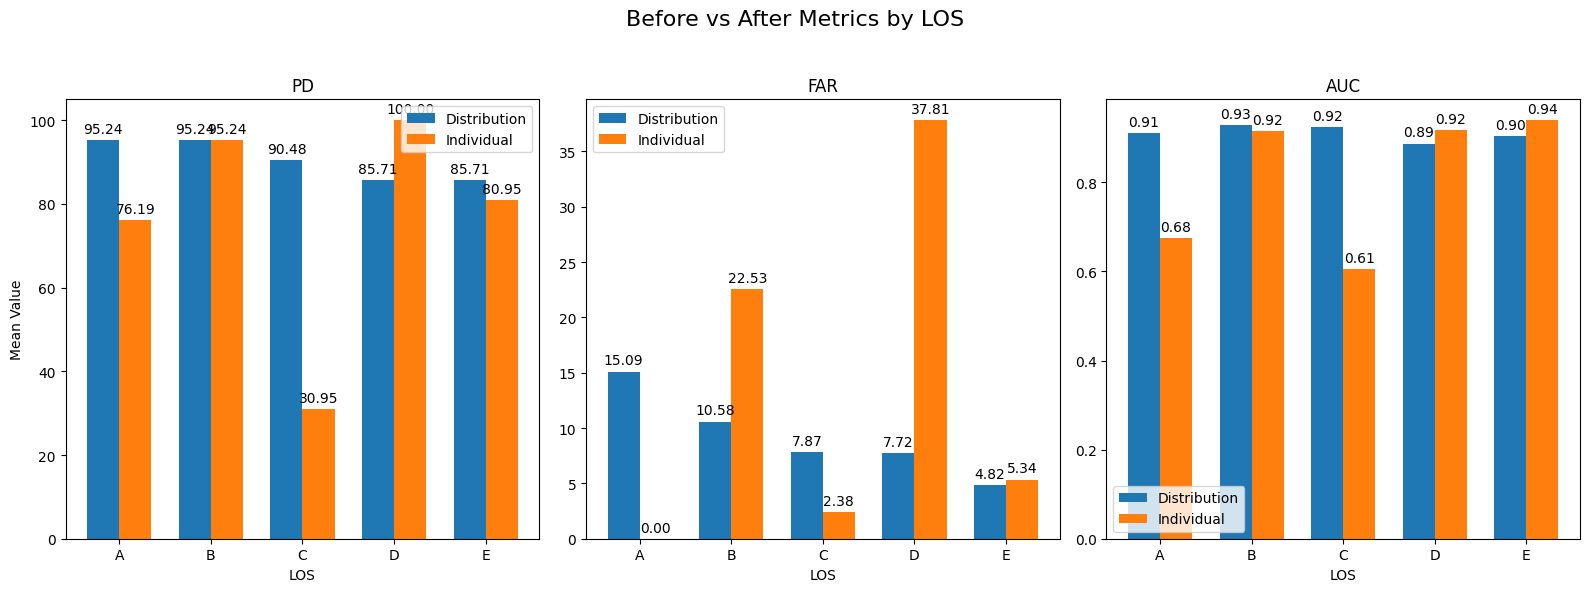

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File names
before_file = "dist_median_metrics_Jerk.csv"
after_file = "each_median_metrics_Jerk.csv"

# Load CSVs
before_df = pd.read_csv(before_file)
after_df = pd.read_csv(after_file)

# LOS categories
LOS_list = ['A', 'B', 'C', 'D', 'E']

# Metrics to compare
metrics = ['PD', 'FAR', 'AUC']

# Plot setup
fig, axes = plt.subplots(1, len(metrics), figsize=(16,6), sharey=False)
fig.suptitle("Before vs After Metrics by LOS", fontsize=16)

for j, metric in enumerate(metrics):
    # Calculate mean values for each LOS and metric
    before_vals = [before_df.loc[before_df['LOS'] == los, metric].dropna().mean() for los in LOS_list]
    after_vals = [after_df.loc[after_df['LOS'] == los, metric].dropna().mean() for los in LOS_list]

    x = np.arange(len(LOS_list))  # label positions
    width = 0.35

    ax = axes[j]
    bars1 = ax.bar(x - width/2, before_vals, width, label='Distribution')
    bars2 = ax.bar(x + width/2, after_vals, width, label='Individual')

    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_xticklabels(LOS_list)
    ax.set_xlabel("LOS")
    if j == 0:
        ax.set_ylabel("Mean Value")
    ax.legend()

    # Add values on top of bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
